#### Japanese Credit Screening Data Set

Data Set Characteristics:  Multivariate, Domain-Theory

Number of Instances:125

Area:Financial

Attribute Characteristics:Categorical, Real, Integer

Number of Attributes:N/A

Date Donated: 1992-03-19

Associated Tasks: Classification

Missing Values?: N/A

Number of Web Hits: 106034


Source:
Creator: Chiharu Sano
Donor: Chiharu Sano
csano '@' bonnie.ICS.UCI.EDU

Data Set Information:
Examples represent positive and negative instances of people who were and were not granted credit.
The theory was generated by talking to the individuals at a Japanese company that grants credit.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv(r'crx.data.csv')

In [3]:
credit.columns = list(range(0,16))

In [4]:
credit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       689 non-null    object 
 1   1       689 non-null    object 
 2   2       689 non-null    float64
 3   3       689 non-null    object 
 4   4       689 non-null    object 
 5   5       689 non-null    object 
 6   6       689 non-null    object 
 7   7       689 non-null    float64
 8   8       689 non-null    object 
 9   9       689 non-null    object 
 10  10      689 non-null    int64  
 11  11      689 non-null    object 
 12  12      689 non-null    object 
 13  13      689 non-null    object 
 14  14      689 non-null    int64  
 15  15      689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


In [6]:
credit.describe()

,2,7,10,14
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


In [7]:
X = credit.iloc[:,:-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0


In [8]:
y = credit.iloc[:,-1]
y.head()

0    +
1    +
2    +
3    +
4    +
Name: 15, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
Encoder = LabelEncoder()
for col in X.columns:
    X[col] = Encoder.fit_transform(X[col])
y = Encoder.fit_transform(y)

In [11]:
X[0:3]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,327,93,2,1,11,4,65,1,1,6,0,0,11,119
1,1,89,16,2,1,11,4,36,1,0,0,0,0,95,140
2,2,125,46,2,1,13,8,73,1,1,5,1,0,31,3


In [12]:
y[0:3]

array([0, 0, 0])

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       689 non-null    int32
 1   1       689 non-null    int32
 2   2       689 non-null    int64
 3   3       689 non-null    int32
 4   4       689 non-null    int32
 5   5       689 non-null    int32
 6   6       689 non-null    int32
 7   7       689 non-null    int64
 8   8       689 non-null    int32
 9   9       689 non-null    int32
 10  10      689 non-null    int64
 11  11      689 non-null    int32
 12  12      689 non-null    int32
 13  13      689 non-null    int32
 14  14      689 non-null    int64
dtypes: int32(11), int64(4)
memory usage: 51.3 KB


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

Now normalize the data

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
X_train[0:5]

array([[-1.29396378,  1.24470288, -0.18158709, -0.44381299, -0.55126869,
        -1.11575313,  0.75952691,  0.46577305,  0.95138759,  1.17234135,
         1.42356708,  1.04673405, -0.30625447,  1.38027781,  2.16806186],
       [-1.29396378, -0.62934998,  1.78717331, -0.44381299, -0.55126869,
         0.95533676, -0.79335526, -0.0233986 , -1.05109633, -0.85299388,
        -0.5725328 , -0.95535251, -0.30625447,  0.73069951, -0.72369691],
       [-1.29396378,  0.49508174,  1.5495643 , -0.44381299, -0.55126869,
         0.95533676, -0.79335526,  2.34093105,  0.95138759,  1.17234135,
         1.42356708, -0.95535251, -0.30625447, -1.25994366,  2.35055149],
       [ 0.67351427,  0.54713876, -1.16596729,  1.59349996,  1.74926385,
         1.41557896,  0.75952691, -0.81150848, -1.05109633, -0.85299388,
        -0.5725328 ,  1.04673405, -0.30625447,  0.85642434, -0.70965925],
       [-1.29396378, -1.06662898,  1.26103907, -0.44381299, -0.55126869,
        -0.88563203, -0.79335526, -0.78433228, 

In [17]:
X_test[0:5]

array([[ 0.65263001,  0.66417355,  0.21129673,  1.77699559,  1.86440639,
         0.65804974,  0.8101418 , -0.81111658,  0.96673649,  1.12903732,
         1.87708263,  1.18616051, -0.34267572,  0.99214174, -0.76711683],
       [ 0.65263001,  1.99038503,  2.1540805 , -0.47967979, -0.5252662 ,
         1.84667362, -0.71094076,  2.65897289,  0.96673649,  1.12903732,
         1.63286132,  1.18616051, -0.34267572, -1.17670751,  1.19997532],
       [-1.30526001,  1.77987527,  2.01653828, -0.47967979, -0.5252662 ,
         0.42032497, -1.0912114 , -0.98177672,  0.96673649,  1.12903732,
         3.09818918, -0.84305623, -0.34267572, -1.17670751,  0.36825179],
       [ 0.65263001,  0.77995391, -0.97500486, -0.47967979, -0.5252662 ,
        -1.00602369,  0.8101418 , -0.72578651, -1.03440804,  1.12903732,
        -0.07668785, -0.84305623, -0.34267572,  0.42907511,  0.7379067 ],
       [ 0.65263001,  1.17992246, -0.33887212, -0.47967979, -0.5252662 ,
         0.18260019, -1.85175268, -0.44135295, 

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [19]:
models = {'LR': LogisticRegression(), 'svm':SVC(), 'knn': KNeighborsClassifier(),
         'DTC': DecisionTreeClassifier(), 'naivebayes': GaussianNB(), 'RFC': RandomForestClassifier()}

for each in models:
    model = models[each]

In [20]:
models = {'LR': LogisticRegression(), 'svm':SVC(), 'knn': KNeighborsClassifier(),
         'DTC': DecisionTreeClassifier(), 'naivebayes': GaussianNB(), 'RFC': RandomForestClassifier()}

for each in models:
    print( models[each])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
        

In [21]:
for each in models:
    model =  models[each]
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print("for model :", each)
    print("Accuracy score: \t", accuracy_score(y_test, ypred))
    print("classification report: \n\n", classification_report(y_test, ypred))
    print("confusion matrix: \n", confusion_matrix(y_test, ypred))
    print("\n\n\n\n")
    #sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt = 'g')

for model : LR
Accuracy score: 	 0.8405797101449275
classification report: 

               precision    recall  f1-score   support

           0       0.81      0.84      0.83        93
           1       0.86      0.84      0.85       114

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

confusion matrix: 
 [[78 15]
 [18 96]]





for model : svm
Accuracy score: 	 0.8502415458937198
classification report: 

               precision    recall  f1-score   support

           0       0.83      0.84      0.83        93
           1       0.87      0.86      0.86       114

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

confusion matrix: 
 [[78 15]
 [16 98]]





for model : knn
Accuracy score: 	 0.8164251207729468
classification report: 

               precisio

Lets see if we can do hypertuning of parameters

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
import pickle
import joblib

In [24]:
clf_LR = GridSearchCV(LogisticRegression(max_iter=1000), {
    'solver': ['liblinear', 'newton-cg', 'sag', 'saga' , 'lbfgs'],
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'multi_class' : ['auto', 'ovr', 'multinomial']},
    cv = 5
     )
clf_LR.fit(X_train, y_train)
df_LR = pd.DataFrame(clf_LR.cv_results_)
print("best estimator: ", clf_LR.best_estimator_)
print("best parameter: ", clf_LR.best_params_)
print("best score: ", clf_LR.best_score_)
df_LR.head()
df_LR[['param_multi_class','param_penalty', 'param_solver','mean_test_score']].sort_values(by='mean_test_score', ascending=False).dropna().head(10)

C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Us

C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFai

best estimator:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
best parameter:  {'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
best score:  0.8671176975945019


,param_multi_class,param_penalty,param_solver,mean_test_score
48,multinomial,l2,saga,0.867118
47,multinomial,l2,sag,0.867118
49,multinomial,l2,lbfgs,0.867118
46,multinomial,l2,newton-cg,0.867118
3,auto,l1,saga,0.867096
26,ovr,l2,newton-cg,0.867096
25,ovr,l2,liblinear,0.867096
23,ovr,l1,saga,0.867096
43,multinomial,l1,saga,0.867096
27,ovr,l2,sag,0.867096


Now we re-run the model with best parameters and then save the model as pickle or joblib object, then we predict our model using dummy data

Note, previously values were:
    
    LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
clfLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
clfLR.fit(X_train,y_train)
ypred = clfLR.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, ypred))

Accuracy:  0.8405797101449275


We see an improvement in the accuracy upto 86.7% from 84%. Now we can use joblib to save the model.

In [26]:
#Saving model with pickle

with open('Credit_screening_LR', 'wb') as f:
    pickle.dump(clfLR, f)
    

In [27]:
with open('Credit_screening_LR','rb') as f:
    ClfLR = pickle.load(f)

Now create some random values to test the prediction

In [28]:
dummydf = pd.DataFrame(np.linspace(0,1,300).reshape(20,15))
dummydf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.003344,0.006689,0.010033,0.013378,0.016722,0.020067,0.023411,0.026756,0.030100,0.033445,0.036789,0.040134,0.043478,0.046823
1,0.050167,0.053512,0.056856,0.060201,0.063545,0.066890,0.070234,0.073579,0.076923,0.080268,0.083612,0.086957,0.090301,0.093645,0.096990
2,0.100334,0.103679,0.107023,0.110368,0.113712,0.117057,0.120401,0.123746,0.127090,0.130435,0.133779,0.137124,0.140468,0.143813,0.147157
3,0.150502,0.153846,0.157191,0.160535,0.163880,0.167224,0.170569,0.173913,0.177258,0.180602,0.183946,0.187291,0.190635,0.193980,0.197324
4,0.200669,0.204013,0.207358,0.210702,0.214047,0.217391,0.220736,0.224080,0.227425,0.230769,0.234114,0.237458,0.240803,0.244147,0.247492


In [29]:
ClfLR.predict(dummydf)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Likewise we can do hyper parameter tuning and model deployment for all fitted models. We will do the same process for RandomForestClassifier as it resulted in best accuracy

In [30]:
clf_RFC = GridSearchCV(RandomForestClassifier(),{
                         
         'criterion':['gini','entropy'], 
         'max_depth':[None, 2,4],
         'max_features':['auto','sqrt','log2'],                     
         'n_estimators':[100,200,300,400,500],
         
}, cv=5
                      )

clf_RFC.fit(X_train, y_train)
df_RFC = pd.DataFrame(clf_RFC.cv_results_)
print("best estimator: ", clf_RFC.best_estimator_)
print("best parameter: ", clf_RFC.best_params_)
print("best score: ", clf_RFC.best_score_)
df_RFC.head()

best estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best parameter:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
best score:  0.8962843642611684


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154012,0.018581,0.009000,6.810597e-07,gini,None,auto,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.855670,0.917526,0.885417,0.895833,0.875000,0.885889,0.020648,12
1,0.289530,0.013849,0.019001,3.999186e-03,gini,None,auto,200,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.824742,0.907216,0.875000,0.895833,0.875000,0.875558,0.028271,41
2,0.437233,0.023304,0.025801,1.165861e-03,gini,None,auto,300,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.845361,0.927835,0.895833,0.895833,0.885417,0.890056,0.026507,5
3,0.552841,0.013791,0.034002,6.328627e-04,gini,None,auto,400,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.835052,0.917526,0.895833,0.885417,0.885417,0.883849,0.027070,15
4,0.692450,0.008523,0.044804,6.114565e-03,gini,None,auto,500,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.835052,0.917526,0.885417,0.885417,0.885417,0.881765,0.026461,20


As we can see the accuracy has increased up to 89.62% from 86%. We will re-run the model with new parameters and then save our model.

In [31]:
clfRFC = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clfRFC.fit(X_train,y_train)
ypred = clfRFC.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, ypred))

Accuracy:  0.8647342995169082


We will also use ANN on the same data

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Using TensorFlow backend.


In [33]:
model = Sequential()

model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))
model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [34]:

model.fit(X_train,y_train, batch_size=10, epochs=100)


Epoch 1/100
482/482 [==============================] - 1s 2ms/step - loss: 8.6085 - accuracy: 0.4419
Epoch 2/100
482/482 [==============================] - 0s 454us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 3/100
482/482 [==============================] - 0s 461us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 4/100
482/482 [==============================] - 0s 469us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 5/100
482/482 [==============================] - 0s 488us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 6/100
482/482 [==============================] - 0s 465us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 7/100
482/482 [==============================] - 0s 463us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 8/100
482/482 [==============================] - 0s 467us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 9/100
482/482 [==============================] - 0s 465us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 10/100
482/482 [==============================] - 0s 481us/step - los

482/482 [==============================] - 0s 486us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 80/100
482/482 [==============================] - 0s 523us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 81/100
482/482 [==============================] - 0s 504us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 82/100
482/482 [==============================] - 0s 469us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 83/100
482/482 [==============================] - 0s 510us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 84/100
482/482 [==============================] - 0s 537us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 85/100
482/482 [==============================] - 0s 525us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 86/100
482/482 [==============================] - 0s 471us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 87/100
482/482 [==============================] - 0s 479us/step - loss: 8.6085 - accuracy: 0.4419
Epoch 88/100
482/482 [==============================] - 0s 471us/step - loss:

In [39]:
yhat = model.predict(X_test)
yhat = (yhat > 0.5)

Accuracy score:  0.4492753623188406
Confusion matrix:  [[ 93   0]
 [114   0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        93
           1       0.00      0.00      0.00       114

    accuracy                           0.45       207
   macro avg       0.22      0.50      0.31       207
weighted avg       0.20      0.45      0.28       207



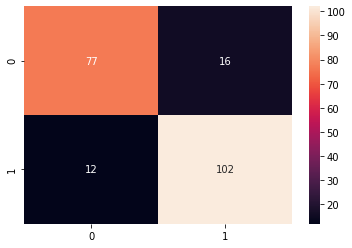

In [40]:
print("Accuracy score: ", accuracy_score(y_test, yhat))
print("Confusion matrix: ", confusion_matrix(y_test, yhat))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='g')
print("Classification report: \n", classification_report(y_test, yhat))

As we see the model has performed poorly. In this case our best choice is RandomForest Classifier.